# Regressione logistica multinomiale

- Abbiamo un dataset di 337 soggetti aventi 5 diversi tipi di occupazione (variabile di risposta categorica).
- Tali soggetti sono descritti dai seguenti attributi: l'essere di etnia bianca (=1) oppure no (=0), i loro anni di istruzione, gli anni stimati di esperienza nella forza-lavoro.
- Vogliamo capire se tali attributi possano in qualche modo influire sulla probabilità che un soggetto abbia una determianta occupazione.
- **Steps**:
    
    - Importazione dati e calcolo della probabilità iniziale di ciascuna categoria
    - Stima del modello logistico multinomiale
    - Interpretazione del modello
    - Calcolo probabilità predette per nuovi soggetti
    - Test per valutare l'effetto totale di un predittore
    - Test per valutare se due categorie possano o meno essere accorpate
    - Plot delle probabilità per le due etnie.

In [1]:
%pylab inline

import pandas as pd
import seaborn as sb
import statsmodels.api as sm

Populating the interactive namespace from numpy and matplotlib


/Users/davidepassaretti/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
my_df = pd.read_csv('occupations.csv')

In [3]:
my_df.head()

,occ,white,ed,exper
0,-menial,1,11,3
1,-menial,1,12,14
2,-menial,1,12,44
3,-menial,1,12,18
4,-menial,0,14,24


In [4]:
y = my_df['occ']

In [5]:
x = my_df.drop('occ', 1)

In [6]:
x['constant'] = 1

In [7]:
x.head()

,white,ed,exper,constant
0,1,11,3,1
1,1,12,14,1
2,1,12,44,1
3,1,12,18,1
4,0,14,24,1


**Le categorie della variabile di risposta hanno le seguenti probabilità iniziali:**

In [8]:
counts_y = y.value_counts()
counts_y / sum(counts_y)

professional    0.332344
craft           0.249258
blue-collar     0.204748
white-collar    0.121662
-menial         0.091988
Name: occ, dtype: float64

**Il modello di regressione logistica multinomiale è il seguente:**

In [9]:
ml_regression = sm.MNLogit(y, x).fit()
ml_regression.summary()

Optimization terminated successfully.
         Current function value: 1.266470
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                    occ   No. Observations:                  337
Model:                        MNLogit   Df Residuals:                      321
Method:                           MLE   Df Model:                           12
Date:                Wed, 25 Oct 2017   Pseudo R-squ.:                  0.1629
Time:                        09:23:09   Log-Likelihood:                -426.80
converged:                       True   LL-Null:                       -509.84
                                        LLR p-value:                 3.010e-29
====================================================================================
 occ=blue-collar       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
white                1.2365      0.724      1.707      0.088      -0.183       2.656
ed                  -0.0994      0.102     -0.972      0.331      -0.300       0.101
exper                0.0047      0.017      0.271      0.786      -0.029       0.039
constant             0.7412      1.520      0.488      0.626      -2.237       3.719
------------------------------------------------------------------------------------
 occ=craft       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
white          0.4723      0.604      0.782      0.434      -0.712       1.657
ed             0.0938      0.098      0.962      0.336      -0.097       0.285
exper          0.0277      0.017      1.660      0.097      -0.005       0.060
constant      -1.0914      1.450     -0.753      0.452      -3.934       1.751
------------------------------------------------------------------------------
occ=professional       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
white                1.7743      0.755      2.350      0.019       0.294       3.254
ed                   0.7789      0.115      6.795      0.000       0.554       1.004
exper                0.0357      0.018      1.977      0.048       0.000       0.071
constant           -11.5183      1.849     -6.228      0.000     -15.143      -7.894
------------------------------------------------------------------------------------
occ=white-collar       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
white                1.5714      0.903      1.741      0.082      -0.198       3.341
ed                   0.3532      0.117      3.011      0.003       0.123       0.583
exper                0.0346      0.019      1.837      0.066      -0.002       0.072
constant            -6.2386      1.899     -3.285      0.001      -9.961      -2.516
====================================================================================
"""

## Interpretazione dei coefficienti in termini di **rapporto tra odds**

Bisogna considerare che il modello logistico multinomiale è un modello in cui le categorie sono confrontate a due a due utilizzando la consueta interpretazione del modello logistico binario. In particolare, l'interpretazione standard è quella di **variazione negli _odds_ di una categoria rispetto ad una categoria di riferimento (_baseline_)**, la quale nel nostro caso è **-menial**. La categoria *baseline* ha tutti i coefficienti (costante inclusa) uguali a 0.

**_Trovandoci in un modello con più predittori, l'interpretazione della relazione tra un dato predittore e la variabile di risposta è possibile solo se consideriamo costanti gli altri predittori._**

Iniziamo con il dire che per le categorie di occupazione **blue-collar** e **craft**, nessuno dei tre predittori (**white**, **ed**, **exper**) contribuisce significativamente (prendendo alfa = 0.05) a far variare gli odds di ciascuna di queste categorie rispetto alla *baseline* **-menial**.

Per quanto riguarda la categoria **white-collar**, né l'essere bianchi (**white**) né gli anni stimati di esperienza della persona nella forza-lavoro (**exper**) danno un contributo significativo per alpha = 0.05, seppure siano comunque molto vicini a tale soglia (per alpha = 0.1 sono invece significativi entrambi). Gli anni di istruzione (**ed**) hanno un effetto significativo su tale categoria: l'aumento di un anno di istruzione fa aumentare gli *odds* di avere un'occupazione **white-collar** rispetto ad una occupazione **-menial** di un fattore pari ad exp(0.3532) = 1.4236, cioè un aumento degli *odds* stimato del 42.36%.

Per quanto riguarda la categoria **professional**, tutti i predittori sono significativi per alpha = 0.05, seppure **exper** sia molto vicino alla soglia di significatività. Gli *odds* di avere un'occupazione **professional** invece di **-menial** sono exp(1.7743) = 5.8962 cioè quasi 6 volte maggiori per i bianchi rispetto ai neri. L'aumento di un anno di istruzione fa aumentare gli *odds* di avere un'occupazione **professional** rispetto ad una occupazione **-menial** di un fattore pari ad exp(0.7789) = 2.1791, cioè gli *odds* sono più che raddoppiati. Un anno in più di esperienza stimato nella forza-lavoro fa aumentare gli *odds* di avere un'occupazione **professional** rispetto ad una occupazione **-menial** di un fattore pari ad exp(0.0357) = 1.0363, ossia un aumento degli *odds* stimato del 3.57%.

## Calcolo delle probabilità predette

In [10]:
x_nuovo = pd.DataFrame([[1, 15, 20, 1], [0, 13, 26, 1]])
x_nuovo.columns = ['white', 'ed', 'exper', 'constant']
x_nuovo

,white,ed,exper,constant
0,1,15,20,1
1,0,13,26,1


In [11]:
prob_predette = ml_regression.predict(x_nuovo)
prob_predette.columns = ['-menial', 'blue-collar', 'craft', 'professional', 'white-collar']
prob_predette

,-menial,blue-collar,craft,professional,white-collar
0,0.040743,0.072826,0.155895,0.577702,0.152833
1,0.196577,0.128062,0.459013,0.123312,0.093036


## Test per valutare l'effetto di un predittore

Vogliamo testare se un predittore può essere omesso dal modello senza particolari conseguenze in termini di potere esplicativo. Abbiamo visto che la variabile **exper** non sembra dare un contributo sostanziale (benché per **occ=professional** abbia comunque una significatività borderline per alfa = 0.05).

Per testare ciò, possiamo avvalerci di un test sul rapporto tra verosimiglianze che confronta le devianze del modello senza il predittore in questione con quello del modello di partenza. Nel caso il test dia un *p*-value superiore a 0.05, potremmo omettere il predittore in questione.

In [12]:
# fit modello ridotto
x_NOexper = x.drop('exper', 1)
ml_regression_NOexper = sm.MNLogit(y, x_NOexper).fit()

Optimization terminated successfully.
         Current function value: 1.279172
         Iterations 6


In [13]:
# devianza modello iniziale
devianza_ml_iniz = - 2 * ml_regression.llf
# gradi di libertà modello iniziale
gdl_ml_iniz = ml_regression.df_resid

# devianza modello ridotto
devianza_ml_NOexper = - 2 * ml_regression_NOexper.llf
# gradi di libertà modello ridotto
gdl_ml_NOexper = ml_regression_NOexper.df_resid

# statistica test
g = devianza_ml_NOexper - devianza_ml_iniz
# gradi di libertà per la statistica test
gdl = gdl_ml_NOexper - gdl_ml_iniz

# il p-value va calcolato su una distribuzione Chi-quadrato con g.d.l. uguali alla differenza in numero di parametri stimati
import scipy.stats as stat
1 - stat.chi2.cdf(g, gdl)

0.073061017031299635

## Test per valutare se due categorie possono essere accorpate

Vogliamo testare, per esempio, se le due categorie **-menial** e **blue-collar** possono essere accorpate in un'unica categoria **menial/blue-collar**. Per fare ciò, possiamo eseguire una regressione logistica sulle sole unità statistiche che sono in queste categorie e vedere se i parametri stimati siano o meno significativi. In caso questo modello ausiliario non sia significativo (**LLR p-value** > 0.05), possiamo accorpare le categorie.

In [14]:
pos = (y == '-menial') | (y == 'blue-collar')
x_sottoins = x[pos]
y_sottoins = y[pos]

sm.MNLogit(y_sottoins, x_sottoins).fit().summary()

Optimization terminated successfully.
         Current function value: 0.599837
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                    occ   No. Observations:                  100
Model:                        MNLogit   Df Residuals:                       96
Method:                           MLE   Df Model:                            3
Date:                Wed, 25 Oct 2017   Pseudo R-squ.:                 0.03112
Time:                        09:23:09   Log-Likelihood:                -59.984
converged:                       True   LL-Null:                       -61.910
                                        LLR p-value:                    0.2778
===================================================================================
occ=blue-collar       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
white               1.2089      0.742      1.630      0.103      -0.245       2.663
ed                 -0.0733      0.098     -0.748      0.454      -0.265       0.119
exper               0.0094      0.017      0.555      0.579      -0.024       0.043
constant            0.3747      1.528      0.245      0.806      -2.620       3.369
===================================================================================
"""

## Plot delle probabilità

Il plot fa riferimento al modello **ml_regression_NOexper**, privo della variabile **exper**.

In [15]:
myrange = np.arange(np.min(x['ed']), np.max(x['ed']), 1)

tutti1 = np.repeat(1, 17, axis=0)
tutti0 = np.repeat(0, 17, axis=0)

myX_white = pd.DataFrame(tutti1)
myX_white['ed'] = myrange
myX_white['constant'] = tutti1

myX_NOwhite = pd.DataFrame(tutti0)
myX_NOwhite['ed'] = myrange
myX_NOwhite['constant'] = tutti1

probs_white = ml_regression_NOexper.predict(myX_white)
probs_NOwhite = ml_regression_NOexper.predict(myX_NOwhite)

probs_white.columns = probs_NOwhite.columns = ['-menial', 'blue-collar', 'craft', 'professional', 'white-collar']

### Etnia bianca

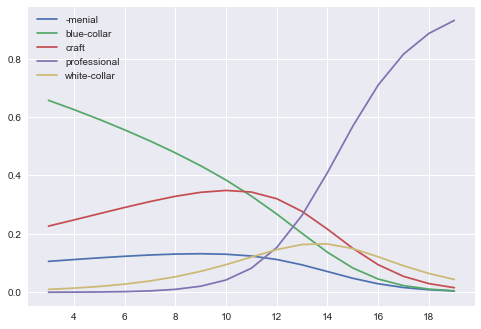

In [16]:
plt.subplot()
plt.plot(myrange, probs_white['-menial'], label="-menial")
plt.plot(myrange, probs_white['blue-collar'], label="blue-collar")
plt.plot(myrange, probs_white['craft'], label="craft")
plt.plot(myrange, probs_white['professional'], label="professional")
plt.plot(myrange, probs_white['white-collar'], label="white-collar")
plt.legend()

### Etnia non bianca

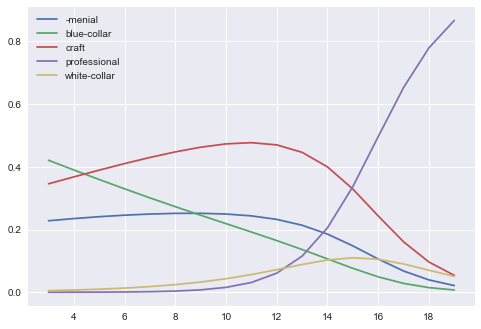

In [17]:
plt.subplot()
plt.plot(myrange, probs_NOwhite['-menial'], label="-menial")
plt.plot(myrange, probs_NOwhite['blue-collar'], label="blue-collar")
plt.plot(myrange, probs_NOwhite['craft'], label="craft")
plt.plot(myrange, probs_NOwhite['professional'], label="professional")
plt.plot(myrange, probs_NOwhite['white-collar'], label="white-collar")
plt.legend()